<a href="https://colab.research.google.com/github/pachterlab/GRNP_2020/blob/master/notebooks/figure_generation/GenFigS7-S21.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Generates the supplementary figures S7-S21**

This notebook generates the data for the supplementary figures evaluation of prediction methods . There are two types of figures here; fig. S7, which shows the overall performance for all datasets, and figure S8-S21, which are more detailed evaluation for individual datasets. Figures S8-S21 are of the same type, but displaying different datasets. 

Steps:
1. Download the code and processed data
2. Setup the R environment
3. Define a general function to generate any of the figures S8-S21 save it to disk
4. Call the figure generation function for all datasets
5. Create an overall evaluation figure over all datasets (Fig. S7)

The data for these figures is produced by the following notebooks:

Processing of FASTQ files with kallisto and bustools:

https://github.com/pachterlab/GRNP_2020/blob/master/notebooks/FASTQ_processing/ProcessEVAL.ipynb
https://github.com/pachterlab/GRNP_2020/blob/master/notebooks/FASTQ_processing/ProcessEVALPBMC.ipynb
https://github.com/pachterlab/GRNP_2020/blob/master/notebooks/FASTQ_processing/ProcessEVALPBMC_DS.ipynb
https://github.com/pachterlab/GRNP_2020/blob/master/notebooks/FASTQ_processing/ProcessEVALPBMC_SW.ipynb
https://github.com/pachterlab/GRNP_2020/blob/master/notebooks/FASTQ_processing/ProcessLC.ipynb
https://github.com/pachterlab/GRNP_2020/blob/master/notebooks/FASTQ_processing/ProcessMRET.ipynb
https://github.com/pachterlab/GRNP_2020/blob/master/notebooks/FASTQ_processing/ProcessMRET2.ipynb
https://github.com/pachterlab/GRNP_2020/blob/master/notebooks/FASTQ_processing/ProcessPBMC_NG.ipynb
https://github.com/pachterlab/GRNP_2020/blob/master/notebooks/FASTQ_processing/ProcessPBMC_NG_2.ipynb
https://github.com/pachterlab/GRNP_2020/blob/master/notebooks/FASTQ_processing/ProcessPBMC_V2.ipynb
https://github.com/pachterlab/GRNP_2020/blob/master/notebooks/FASTQ_processing/ProcessPBMC_V3.ipynb
https://github.com/pachterlab/GRNP_2020/blob/master/notebooks/FASTQ_processing/ProcessPBMC_V3_2.ipynb
https://github.com/pachterlab/GRNP_2020/blob/master/notebooks/FASTQ_processing/ProcessPBMC_V3_3.ipynb
https://github.com/pachterlab/GRNP_2020/blob/master/notebooks/FASTQ_processing/ProcessMARSSEQ.ipynb

Preprocessing of BUG files:

https://github.com/pachterlab/GRNP_2020/blob/master/notebooks/R_processing/ProcessR_EVAL.ipynb
https://github.com/pachterlab/GRNP_2020/blob/master/notebooks/R_processing/ProcessR_EVALPBMC.ipynb
https://github.com/pachterlab/GRNP_2020/blob/master/notebooks/R_processing/ProcessR_EVALPBMC_DS.ipynb
https://github.com/pachterlab/GRNP_2020/blob/master/notebooks/R_processing/ProcessR_EVALPBMC_SW.ipynb
https://github.com/pachterlab/GRNP_2020/blob/master/notebooks/R_processing/ProcessR_LC.ipynb
https://github.com/pachterlab/GRNP_2020/blob/master/notebooks/R_processing/ProcessR_MRET.ipynb
https://github.com/pachterlab/GRNP_2020/blob/master/notebooks/R_processing/ProcessR_MRET2.ipynb
https://github.com/pachterlab/GRNP_2020/blob/master/notebooks/R_processing/ProcessR_PBMC_NG.ipynb
https://github.com/pachterlab/GRNP_2020/blob/master/notebooks/R_processing/ProcessR_PBMC_NG_2.ipynb
https://github.com/pachterlab/GRNP_2020/blob/master/notebooks/R_processing/ProcessR_PBMC_V2.ipynb
https://github.com/pachterlab/GRNP_2020/blob/master/notebooks/R_processing/ProcessR_PBMC_V3.ipynb
https://github.com/pachterlab/GRNP_2020/blob/master/notebooks/R_processing/ProcessR_PBMC_V3_2.ipynb
https://github.com/pachterlab/GRNP_2020/blob/master/notebooks/R_processing/ProcessR_PBMC_V3_3.ipynb
https://github.com/pachterlab/GRNP_2020/blob/master/notebooks/R_processing/ProcessR_MARSSEQ.ipynb

Precalculate figure data: 

https://github.com/pachterlab/GRNP_2020/blob/master/notebooks/figure_generation/GenFigS7-S21Data.ipynb


**1. Download the code and processed data**

In [1]:
#download the R code
![ -d "GRNP_2020" ] && rm -r GRNP_2020

!git clone https://github.com/pachterlab/GRNP_2020.git


Cloning into 'GRNP_2020'...
remote: Enumerating objects: 228, done.
remote: Counting objects: 100% (228/228), done.
remote: Compressing objects: 100% (184/184), done.
remote: Total 1946 (delta 160), reused 67 (delta 44), pack-reused 1718
Receiving objects: 100% (1946/1946), 9.83 MiB | 17.44 MiB/s, done.
Resolving deltas: 100% (1345/1345), done.


In [2]:
#download processed data from Zenodo for all datasets
![ -d "data" ] && rm -r data
!mkdir figureData
!cd figureData && wget https://zenodo.org/record/4661263/files/EVAL.zip?download=1 && unzip 'EVAL.zip?download=1' && rm 'EVAL.zip?download=1'
!cd figureData && wget https://zenodo.org/record/4661263/files/EVALPBMC.zip?download=1 && unzip 'EVALPBMC.zip?download=1' && rm 'EVALPBMC.zip?download=1'
!cd figureData && wget https://zenodo.org/record/4661263/files/EVALPBMC_DS.zip?download=1 && unzip 'EVALPBMC_DS.zip?download=1' && rm 'EVALPBMC_DS.zip?download=1'
!cd figureData && wget https://zenodo.org/record/4661263/files/EVALPBMC_SW.zip?download=1 && unzip 'EVALPBMC_SW.zip?download=1' && rm 'EVALPBMC_SW.zip?download=1'
!cd figureData && wget https://zenodo.org/record/4661263/files/MRET.zip?download=1 && unzip 'MRET.zip?download=1' && rm 'MRET.zip?download=1'
!cd figureData && wget https://zenodo.org/record/4661263/files/MRET2.zip?download=1 && unzip 'MRET2.zip?download=1' && rm 'MRET2.zip?download=1'
!cd figureData && wget https://zenodo.org/record/4661263/files/LC.zip?download=1 && unzip 'LC.zip?download=1' && rm 'LC.zip?download=1'
!cd figureData && wget https://zenodo.org/record/4661263/files/PBMC_V2.zip?download=1 && unzip 'PBMC_V2.zip?download=1' && rm 'PBMC_V2.zip?download=1'
!cd figureData && wget https://zenodo.org/record/4661263/files/PBMC_V3.zip?download=1 && unzip 'PBMC_V3.zip?download=1' && rm 'PBMC_V3.zip?download=1'
!cd figureData && wget https://zenodo.org/record/4661263/files/PBMC_V3_2.zip?download=1 && unzip 'PBMC_V3_2.zip?download=1' && rm 'PBMC_V3_2.zip?download=1'
!cd figureData && wget https://zenodo.org/record/4661263/files/PBMC_V3_3.zip?download=1 && unzip 'PBMC_V3_3.zip?download=1' && rm 'PBMC_V3_3.zip?download=1'
!cd figureData && wget https://zenodo.org/record/4661263/files/PBMC_NG.zip?download=1 && unzip 'PBMC_NG.zip?download=1' && rm 'PBMC_NG.zip?download=1'
!cd figureData && wget https://zenodo.org/record/4661263/files/PBMC_NG_2.zip?download=1 && unzip 'PBMC_NG_2.zip?download=1' && rm 'PBMC_NG_2.zip?download=1'
!cd figureData && wget https://zenodo.org/record/4661263/files/MARSSEQ.zip?download=1 && unzip 'MARSSEQ.zip?download=1' && rm 'MARSSEQ.zip?download=1'


--2021-04-03 23:06:39--  https://zenodo.org/record/4661263/files/EVAL.zip?download=1
Resolving zenodo.org (zenodo.org)... 137.138.76.77
Connecting to zenodo.org (zenodo.org)|137.138.76.77|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 206479312 (197M) [application/octet-stream]
Saving to: ‘EVAL.zip?download=1’

EVAL.zip?download=1 100%[===================>] 196.91M  8.74MB/s    in 27s     

2021-04-03 23:07:07 (7.27 MB/s) - ‘EVAL.zip?download=1’ saved [206479312/206479312]

Archive:  EVAL.zip?download=1
   creating: EVAL/
  inflating: EVAL/Bug_10.RData       
  inflating: EVAL/Bug_100.RData      
  inflating: EVAL/Bug_20.RData       
  inflating: EVAL/Bug_25.RData       
  inflating: EVAL/Bug_40.RData       
  inflating: EVAL/Bug_5.RData        
  inflating: EVAL/Bug_60.RData       
  inflating: EVAL/Bug_80.RData       
  inflating: EVAL/ds_summary.txt     
  inflating: EVAL/PredEvalData.RDS   
  inflating: EVAL/Stats.RData        
--2021-04-03 23:07:09--  ht

In [3]:
#Check that download worked
!cd figureData && ls -l && cd EVAL && ls -l

total 56
drwxr-xr-x 2 root root 4096 Jul  1  2020 EVAL
drwxr-xr-x 2 root root 4096 Jul  1  2020 EVALPBMC
drwxr-xr-x 2 root root 4096 Jul  1  2020 EVALPBMC_DS
drwxr-xr-x 2 root root 4096 Jul  1  2020 EVALPBMC_SW
drwxr-xr-x 2 root root 4096 Jul  1  2020 LC
drwxr-xr-x 2 root root 4096 Feb  4 19:07 MARSSEQ
drwxr-xr-x 2 root root 4096 Jul  1  2020 MRET
drwxr-xr-x 2 root root 4096 Jul  1  2020 MRET2
drwxr-xr-x 2 root root 4096 Jul  1  2020 PBMC_NG
drwxr-xr-x 2 root root 4096 Jul  1  2020 PBMC_NG_2
drwxr-xr-x 2 root root 4096 Jul  1  2020 PBMC_V2
drwxr-xr-x 2 root root 4096 Jul  1  2020 PBMC_V3
drwxr-xr-x 2 root root 4096 Jul  1  2020 PBMC_V3_2
drwxr-xr-x 2 root root 4096 Jul  1  2020 PBMC_V3_3
total 212788
-rw-r--r-- 1 root root 37523336 Jun 30  2020 Bug_100.RData
-rw-r--r-- 1 root root 17301493 Jun 30  2020 Bug_10.RData
-rw-r--r-- 1 root root 23443334 Jun 30  2020 Bug_20.RData
-rw-r--r-- 1 root root 25288320 Jun 30  2020 Bug_25.RData
-rw-r--r-- 1 root root 29057075 Jun 30  2020 Bug_40.RData

**2. Prepare the R environment**

In [4]:
#switch to R mode
%reload_ext rpy2.ipython


In [5]:
#install the R packages and setup paths
%%R
install.packages("dplyr")
#install.packages("preseqR")
install.packages("ggplot")
install.packages("DescTools")
install.packages("ggpubr")



R[write to console]: Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

R[write to console]: trying URL 'https://cran.rstudio.com/src/contrib/dplyr_1.0.5.tar.gz'

R[write to console]: Content type 'application/x-gzip'
R[write to console]:  length 949019 bytes (926 KB)

R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write to console]: =
R[write 

**3. Define a general function to generate any of the figures S8-S21 and save it to disk**

This function creates a prediction evaluation figure for a dataset and saves it to file. We show the following five methods.

1. Preseq DS (Rational functions approximation), trunkating CU histograms at 2
2. Preseq DS, trunkating CU histograms at 20
3. Zero-trunkated negative binomial (ZTNB)
4. "Best practice", which selects Preseq DS (here with histograms trunkated at 2) if the number of copies per molecule CV > 1, otherwise ZTNB.
5. Scaling only - scales all genes equally, i.e. makes no advanced prediction

The plots are based on a loess fit of the prediction errors.

In [6]:
#First set some path variables
%%R
source("GRNP_2020/RCode/pathsGoogleColab.R")


In [7]:
#Import the code for prediction (available in other notebooks)
%%R
source(paste0(sourcePath,"ButterflyHelpers.R"))
#source(paste0(sourcePath,"preseqHelpers.R"))
source(paste0(sourcePath,"CCCHelpers.R"))
source(paste0(sourcePath,"ggplotHelpers.R"))





R[write to console]: 
Attaching package: ‘dplyr’


R[write to console]: The following objects are masked from ‘package:stats’:

    filter, lag


R[write to console]: The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




In [8]:
#Define a function that creates a figure for a dataset
%%R
library("ggpubr")

PlotEvaluationForDS <- function(dsid) {
  filename = paste0(figure_data_path, dsid, "/PredEvalData.RDS")
  dsdata <- readRDS(filename)
  x = dsdata[[1]]
  dsCounts = dsdata[[2]]
  predGT005 = dsdata[[3]]
  predPSDS005_2 = dsdata[[4]]
  predPSDS005_20 = dsdata[[5]]
  predPSZTNB005 = dsdata[[6]]
  
  predds_20 = dsdata[[7]]
  predds_2 = dsdata[[8]]
  predztnb = dsdata[[9]]
  predbp = dsdata[[10]]
  predscaled = dsdata[[11]]
  fracOnes = dsdata[[12]]
  fullUMIs = dsdata[[13]]
  umis = dsdata[[14]]
  merged2srt = dsdata[[15]]

  colors = gg_color_hue(6);#make sure to get the same colors in all plots
  
  
  dat = c(predGT005, predPSDS005_2, predPSDS005_20, predPSZTNB005)
  meth = factor(c(rep(0,7),rep(1,7), rep(2,7), rep(3,7)), c(0,1,2,3), c("Good-Toulmin", "DS, MT=2", "DS, MT=20", "ZTNB"))
  x = c(0.05,0.1,0.2,0.4,0.6,0.8,1);
  xes = c(x,x,x,x)
  df = data.frame(data=dat, Method=meth, x=xes)
  df2 = data.frame(data=dsCounts, x = x)
  
  p3_1 = ggplot(df, aes(x=x, y=data)) + 
    geom_line(aes(colour = Method), size=1.2) + 
    geom_point(data=df2) +
    ggtitle("Prediction, All Genes") +
    xlab("Down-sampling factor") + ylab("UMIs") + 
    coord_cartesian(ylim = c(0, 1.1*max(predPSDS005_2[7], predPSDS005_20[7], predPSZTNB005[7]))) +
    theme(legend.justification = c("right", "bottom"), legend.position= c(0.98, 0.02), legend.title = element_blank()) + 
    scale_color_manual(values=colors[c(1,3:5)])
  #print(p3_1)
  
  
  
  ######################################################################
  #make a plot showing relative error as a function of number of UMIs per gene
  ######################################################################
  
  logumis = log2(umis) #so the x axis is the number of UMIs, but for Log fold change, we normalize on library size
  
  #assign scaled to infinite values (just a few points, doesn't really affect much):
  predds_20[is.infinite(predds_20)] = predscaled[is.infinite(predds_20)]
  predds_2[is.infinite(predds_2)] = predscaled[is.infinite(predds_2)]
  predztnb[is.infinite(predztnb)] = predscaled[is.infinite(predztnb)]
  predbp[is.infinite(predbp)] = predscaled[is.infinite(predbp)]
  
  
  #calculate lfc
  lfc_ds_20 = log2((predds_20/sum(predds_20))/(fullUMIs/sum(fullUMIs)))
  lfc_ds_2 = log2((predds_2/sum(predds_2))/(fullUMIs/sum(fullUMIs)))
  lfc_ztnb = log2((predztnb/sum(predztnb))/(fullUMIs/sum(fullUMIs)))
  lfc_bp = log2((predbp/sum(predbp))/(fullUMIs/sum(fullUMIs)))
  lfc_scaled = log2((predscaled/sum(predscaled))/(fullUMIs/sum(fullUMIs)))
  

  
  #Fig 3_2-3_5
  
  dfplot = data.frame(x=logumis, y=lfc_ds_2)
  dfline = data.frame(x=c(0,max(logumis)), y=c(0,0))
  
  p3_2 = ggplot(dfplot,aes(x=x,y=y)) + 
    geom_point(shape=1) + #(alpha=0.3, shape=1) + #, size=1) + 
    geom_line(data=dfline, color="red", size=1) + 
    ylim(-5.5,3) +
    ggtitle("Preseq, DS, MT=2") +
    labs(y=expression(Log[2]*" fold change"), x=expression(Log[2]*"(UMIs)"))
  
  #print(p3_2)
  
  dfplot = data.frame(x=logumis, y=lfc_ds_20)

  p3_3 = ggplot(dfplot,aes(x=x,y=y)) + 
    geom_point(shape=1) + #(alpha=0.3, shape=1) + #, size=1) + 
    geom_line(data=dfline, color="red", size=1) + 
    ylim(-5.5,3) +
    ggtitle("Preseq, DS, MT=20") +
    labs(y=expression(Log[2]*" fold change"), x=expression(Log[2]*"(UMIs)"))
  
  #print(p3_3)
  
  dfplot = data.frame(x=logumis, y=lfc_ztnb)

  p3_4 = ggplot(dfplot,aes(x=x,y=y)) + 
    geom_point(shape=1) + #(alpha=0.3, shape=1) + #, size=1) + 
    geom_line(data=dfline, color="red", size=1) + 
    ylim(-5.5,3) +
    ggtitle("Preseq, ZTNB") +
    labs(y=expression(Log[2]*" fold change"), x=expression(Log[2]*"(UMIs)"))
  
  #print(p3_4)
  
  dfplot = data.frame(x=logumis, y=lfc_scaled)

  p3_5 = ggplot(dfplot,aes(x=x,y=y)) + 
    geom_point(shape=1) + #(alpha=0.3, shape=1) + #, size=1) + 
    geom_line(data=dfline, color="red", size=1) + 
    ylim(-5,3) +
    ggtitle("All Genes Scaled Equally") +
    labs(y=expression(Log[2]*" fold change"), x=expression(Log[2]*"(UMIs)"))
  
  #print(p3_5)
  

  df = data.frame(x=logumis, ds_20=abs(lfc_ds_20), ds_2=abs(lfc_ds_2), ztnb = abs(lfc_ztnb), bp = abs(lfc_bp), scaled = abs(lfc_scaled) )
  
  #now, a loess for each
  #since we have many identical values, we need to aggregate them
  #the new value is the mean, and weight is the number of identical values
  cons = df %>% group_by(x) %>% summarize(weight=n(), ds_2 = mean(ds_2), ds_20 = mean(ds_20), ztnb = mean(ztnb), bp=mean(bp), scaled = mean(scaled))

  
  loess_fitds_2 <- loess(ds_2~x, cons, span = 0.75, weights=cons$weight)
  yds_2 = predict(loess_fitds_2, cons$x)

  loess_fitds_20 <- loess(ds_20~x, cons, span = 0.75, weights=cons$weight)
  yds_20 = predict(loess_fitds_20, cons$x)

  loess_fitztnb <- loess(ztnb~x, cons, span = 0.75, weights=cons$weight)
  yztnb = predict(loess_fitztnb, cons$x)

  loess_fitbp <- loess(bp~x, cons, span = 0.75, weights=cons$weight) 
  ybp = predict(loess_fitbp, cons$x)

  loess_fitscaled <- loess(scaled~x, cons, span = 0.75, weights=cons$weight)
  yscaled = predict(loess_fitscaled, cons$x)

  filt = cons$x <=40 #means no filtering
  
  xes = rep(cons$x[filt],5)
  ys = c(yscaled[filt], yds_2[filt], yds_20[filt], yztnb[filt], ybp[filt])
  l = length(cons$x[filt])
  meth = factor(c(rep(0,l),rep(1,l), rep(2,l), rep(3,l), rep(4,l)), c(0,1,2,3,4), 
                c("Lin. scaled", "DS, MT=2", "DS, MT=20", "ZTNB", "Best pract."))

  dfplot = data.frame(x=xes, y = ys, Method=meth)
  
  p3_6 = ggplot(dfplot, aes(x=x, y=y)) + 
    geom_line(aes(colour = Method), size=1.2) + 
    ggtitle("Prediction per Gene") +
    labs(y="abs(LFC)", x=expression(Log[2]*"(UMIs)"))+
    coord_cartesian(ylim = c(0,1.2)) +
    theme(legend.justification = c("right", "top"), legend.position= c(.98, .98), legend.title = element_blank()) + 
    scale_color_manual(values=colors[2:6])
  #print(p3_6)
  
  
  
  ################################
  # Now merge all figures
  ################################
  
  
  figMultTop = ggarrange(p3_1,p3_6, nrow=1, ncol=2, labels=c("A","B"))
  figMultBottom = ggarrange(p3_2,p3_3,p3_4,p3_5, nrow=2, ncol=2, labels=c("C","D","E","F"))
  figMult = ggarrange(figMultTop, figMultBottom, nrow=2, ncol=1, heights = c(0.75,1),labels=c("",""))
  
  fig3 = figMult
  print(fig3)
  ggsave(
    paste0(figure_path, "FigSX_", dsid, ".png"),
    plot = fig3, device = "png",
    width = 6, height = 9, dpi = 300)
}


**4. Call the figure generation function for all datasets (generates fig. S8-S21)**


In [9]:
#create figure directory
![ -d "figures" ] && rm -r figures
!mkdir figures

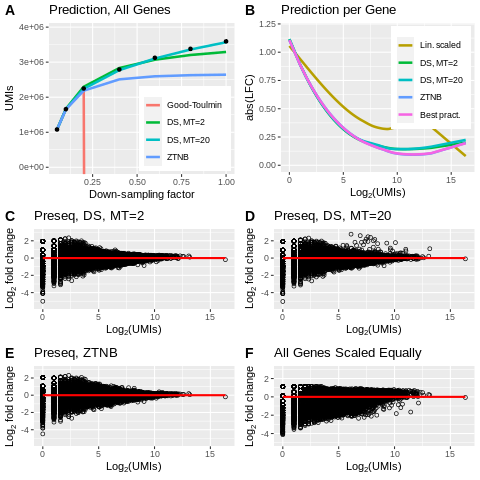

In [10]:
%%R
PlotEvaluationForDS("EVAL")


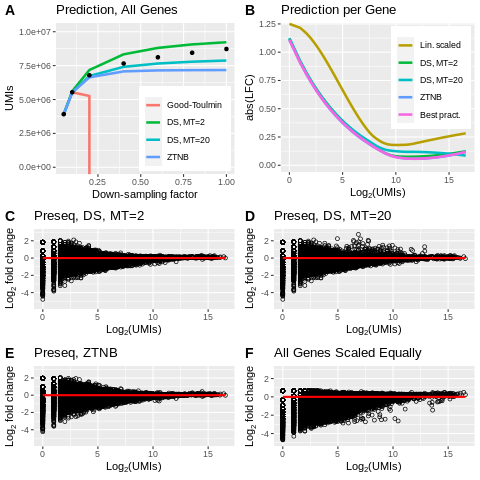

In [11]:
%%R
PlotEvaluationForDS("EVALPBMC")


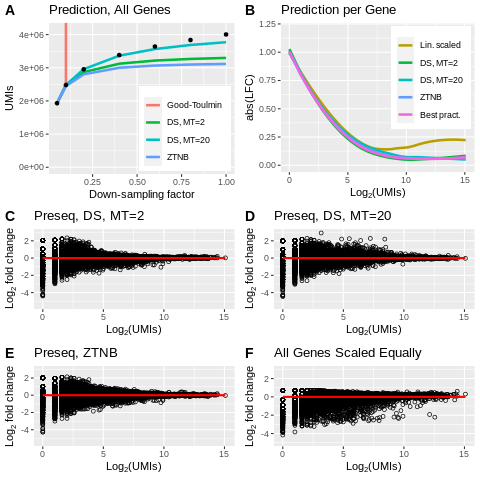

In [12]:
%%R
PlotEvaluationForDS("EVALPBMC_DS")


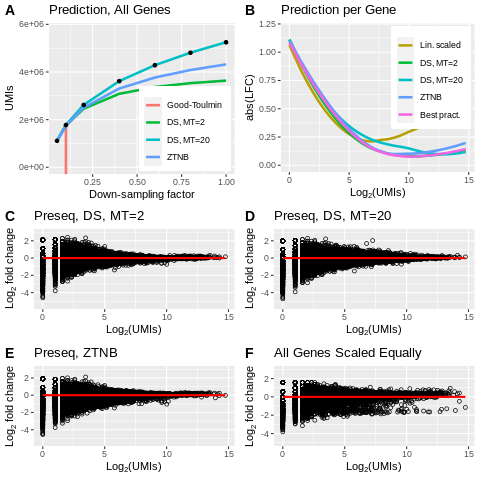

In [13]:
%%R
PlotEvaluationForDS("EVALPBMC_SW")


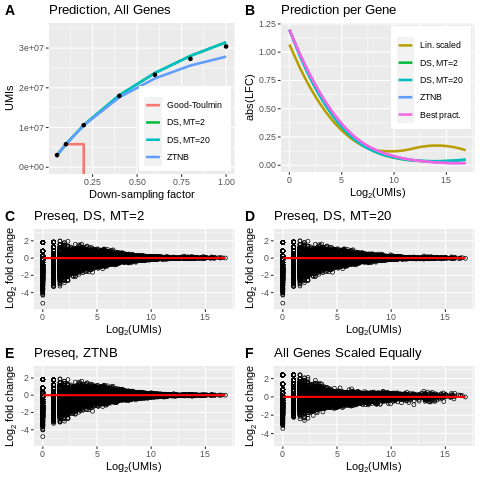

In [14]:
%%R
PlotEvaluationForDS("PBMC_V3")


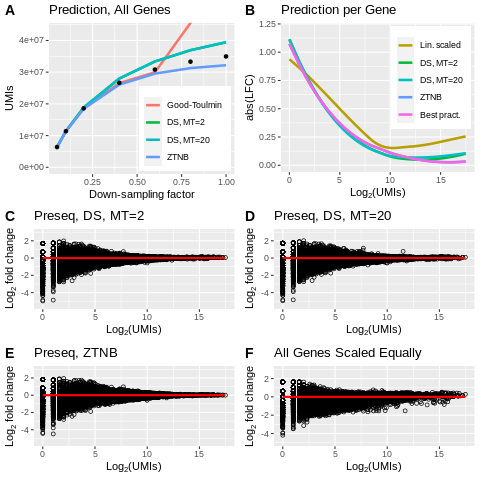

In [15]:
%%R
PlotEvaluationForDS("PBMC_V3_2")


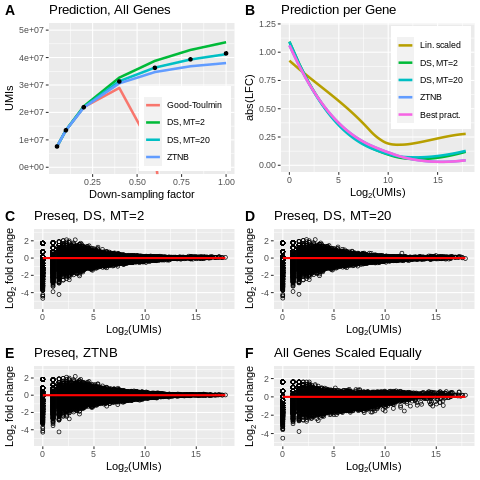

In [16]:
%%R
PlotEvaluationForDS("PBMC_V3_3")


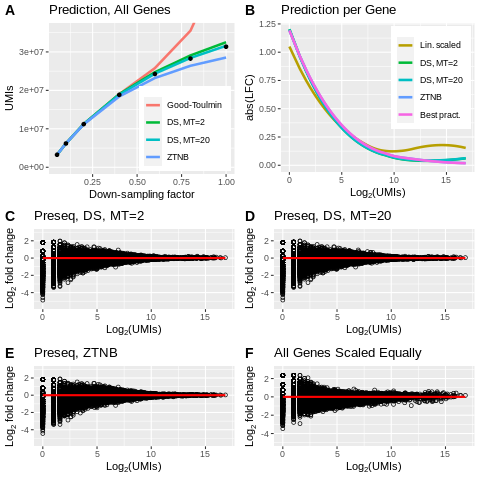

In [17]:
%%R
PlotEvaluationForDS("PBMC_NG")


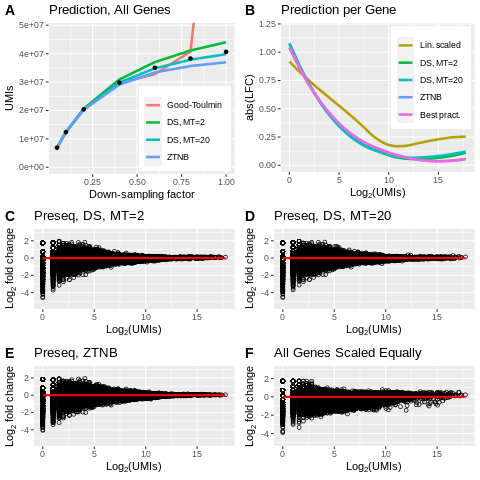

In [18]:
%%R
PlotEvaluationForDS("PBMC_NG_2")


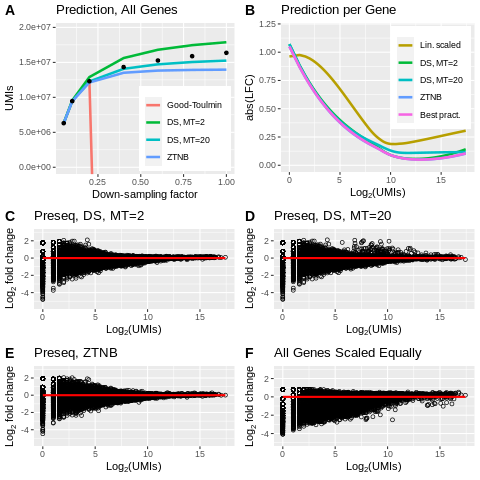

In [19]:
%%R
PlotEvaluationForDS("PBMC_V2")


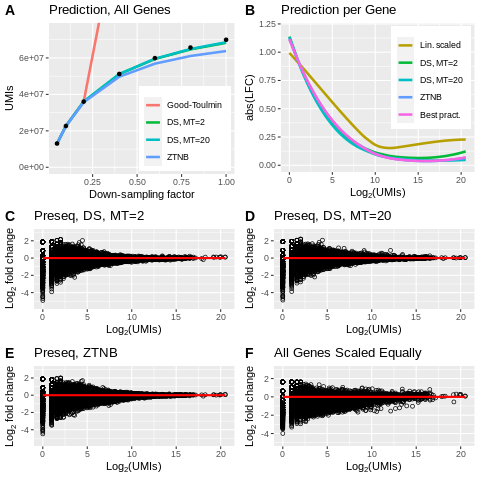

In [20]:
%%R
PlotEvaluationForDS("LC")


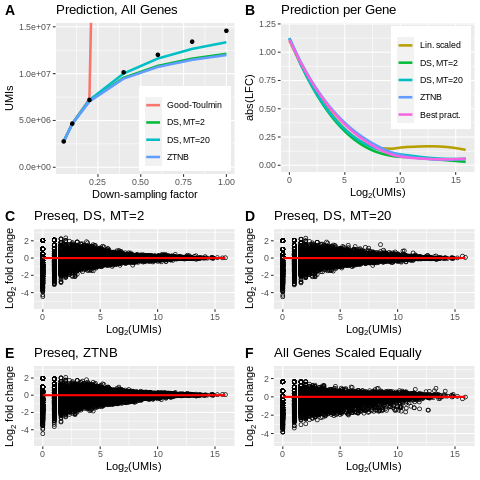

In [21]:
%%R
PlotEvaluationForDS("MRET")


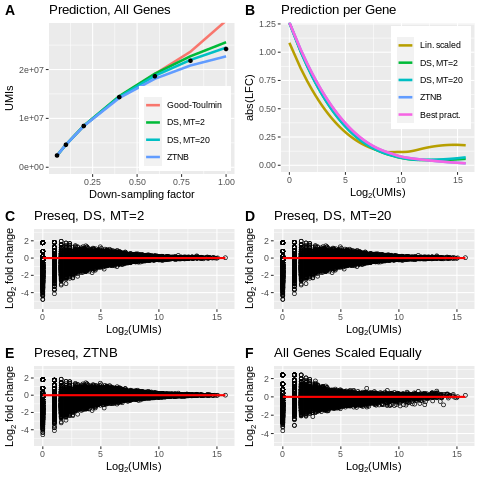

In [22]:
%%R
PlotEvaluationForDS("MRET2")

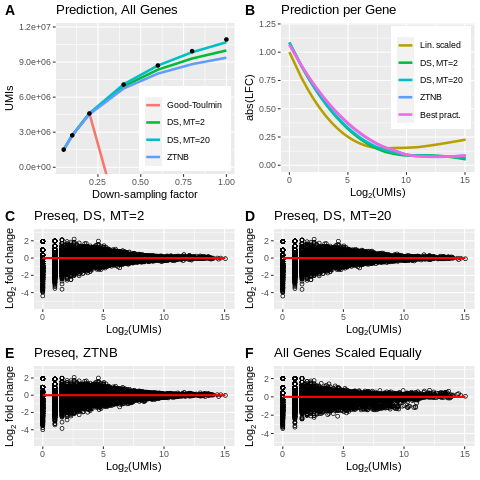

In [23]:
%%R
PlotEvaluationForDS("MARSSEQ")

**5. Create an overall evaluation figure over all datasets (Fig. S7)**

In [24]:
#Assemble the precalculated data from all datasets:
%%R
dsidlist = c("EVAL", "EVALPBMC", "EVALPBMC_DS", "EVALPBMC_SW", "PBMC_V3", "PBMC_V3_2", "PBMC_V3_3", "PBMC_NG", "PBMC_NG_2", "PBMC_V2", "LC", "MRET", "MRET2", "MARSSEQ")


numds = length(dsidlist)

#assemble all data
##################

dsCounts = matrix(0, ncol=7, nrow=numds)
predGT005 = matrix(0, ncol=7, nrow=numds)
predPSDS005_2 = matrix(0, ncol=7, nrow=numds)
predPSDS005_20 = matrix(0, ncol=7, nrow=numds)
predPSZTNB005 = matrix(0, ncol=7, nrow=numds)

predds_20 = NULL
predds_2 = NULL#vector(mode = "list", length = numds)
predztnb = NULL
predbp = NULL
predscaled = NULL
fracOnes = vector(mode = "list", length = numds)
fullUMIs = NULL
umis = NULL
merged2srt = vector(mode = "list", length = numds)

cpms_ds20 = NULL
cpms_ds2 = NULL
cpms_ztnb = NULL
cpms_bp = NULL
cpms_scaled = NULL
cpms_fullumis = NULL

for (i in 1:numds) {
  filename = paste0(figure_data_path, dsidlist[[i]], "/PredEvalData.RDS")
  dsdata <- readRDS(filename)
  dsCounts[i,] = dsdata[[2]]
  predGT005[i,] = dsdata[[3]]
  predPSDS005_2[i,] = dsdata[[4]]
  predPSDS005_20[i,] = dsdata[[5]]
  predPSZTNB005[i,] = dsdata[[6]]
  
  ds20 = dsdata[[7]]
  ds2 = dsdata[[8]]
  ztnb = dsdata[[9]]
  bp = dsdata[[10]]
  scaled = dsdata[[11]]
  fullumistmp = dsdata[[13]]
  umistmp = dsdata[[14]]
  
  #assign scaled to infinite values (just a few points, doesn't really affect much):
  ds20[is.infinite(ds20)] = scaled[is.infinite(ds20)]
  ds2[is.infinite(ds2)] = scaled[is.infinite(ds2)]
  ztnb[is.infinite(ztnb)] = scaled[is.infinite(ztnb)]
  bp[is.infinite(bp)] = scaled[is.infinite(bp)]
  
  cpms_ds20 = c(cpms_ds20, ds20*10^6/sum(ds20))
  cpms_ds2 = c(cpms_ds2, ds2*10^6/sum(ds2))
  cpms_ztnb = c(cpms_ztnb, ztnb*10^6/sum(ztnb))
  cpms_bp = c(cpms_bp, bp*10^6/sum(bp))
  cpms_scaled = c(cpms_scaled, scaled*10^6/sum(scaled))
  cpms_fullumis = c(cpms_fullumis, fullumistmp*10^6/sum(fullumistmp))
  
  predds_20 = c(predds_20, ds20)
  predds_2 = c(predds_2, ds2)
  predztnb = c(predztnb, ztnb)
  predbp = c(predbp, bp)
  predscaled = c(predscaled, scaled)
  fullUMIs = c(fullUMIs, fullumistmp)
  umis = c(umis, umistmp)
}  


[1] "CCC, DS MT=20: 0.990034100252578"
[1] "CCC, DS MT=2: 0.99042597261237"
[1] "CCC, ZTNB : 0.989695597902903"
[1] "CCC, BP: 0.989762006113695"
[1] "CCC, scaled: 0.981564855777159"


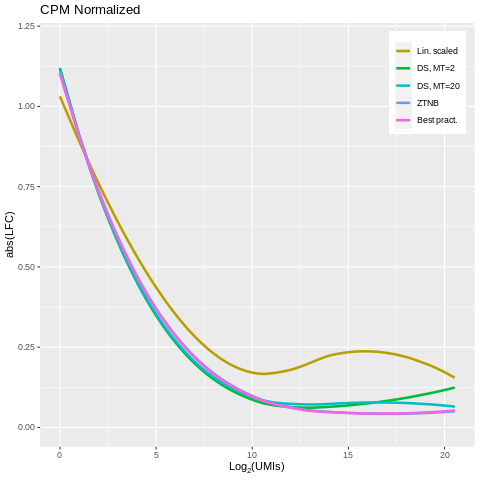

In [25]:
#Fig S6 B
#Relative error as a function of number of UMIs per gene, for all datasets combined
######################################################################
%%R

colors = gg_color_hue(6);#make sure to get the same colors in all plots


logumis = log2(umis) #so the x axis is the number of UMIs, but for Log fold change, we normalize on library size

#calculate lfc
lfc_ds_20 = log2(cpms_ds20/cpms_fullumis)
lfc_ds_2 = log2(cpms_ds2/cpms_fullumis)
lfc_ztnb = log2(cpms_ztnb/cpms_fullumis)
lfc_bp = log2(cpms_bp/cpms_fullumis)
lfc_scaled = log2(cpms_scaled/cpms_fullumis)

#calculate lfc abs
lfc_abs_ds_20 = log2((predds_20)/(fullUMIs))
lfc_abs_ds_2 = log2((predds_2)/(fullUMIs))
lfc_abs_ztnb = log2((predztnb)/(fullUMIs))
lfc_abs_bp = log2((predbp)/(fullUMIs))
lfc_abs_scaled = log2((predscaled)/(fullUMIs))

#calculate CCC vs identity
CCCds20 = getCCC(log2(cpms_ds20+1), log2(cpms_fullumis + 1))
CCCds2 = getCCC(log2(cpms_ds2+1), log2(cpms_fullumis + 1))
CCCztnb = getCCC(log2(cpms_ztnb+1), log2(cpms_fullumis + 1))
CCCbp = getCCC(log2(cpms_bp+1), log2(cpms_fullumis + 1))
CCCscaled = getCCC(log2(cpms_scaled+1), log2(cpms_fullumis + 1))
print(paste0("CCC, DS MT=20: ", CCCds20))
print(paste0("CCC, DS MT=2: ", CCCds2))
print(paste0("CCC, ZTNB : ", CCCztnb))
print(paste0("CCC, BP: ", CCCbp))
print(paste0("CCC, scaled: ", CCCscaled))

df = data.frame(x=logumis, ds_20=abs(lfc_ds_20), ds_2=abs(lfc_ds_2), ztnb = abs(lfc_ztnb), bp = abs(lfc_bp), scaled = abs(lfc_scaled) )

#now, a loess for each
#since we have many identical values, we need to aggregate them
#the new value is the mean, and weight is the number of identical values
cons = df %>% group_by(x) %>% summarize(weight=n(), ds_2 = mean(ds_2), ds_20 = mean(ds_20), ztnb = mean(ztnb), bp=mean(bp), scaled = mean(scaled))

loess_fitds_2 <- loess(ds_2~x, cons, span = 0.75, weights=cons$weight)
yds_2 = predict(loess_fitds_2, cons$x)

loess_fitds_20 <- loess(ds_20~x, cons, span = 0.75, weights=cons$weight)
yds_20 = predict(loess_fitds_20, cons$x)

loess_fitztnb <- loess(ztnb~x, cons, span = 0.75, weights=cons$weight)
yztnb = predict(loess_fitztnb, cons$x)

#skip this one, it is almost identical to ztnb
loess_fitbp <- loess(bp~x, cons, span = 0.75, weights=cons$weight) 
ybp = predict(loess_fitbp, cons$x)

loess_fitscaled <- loess(scaled~x, cons, span = 0.75, weights=cons$weight)
yscaled = predict(loess_fitscaled, cons$x)

#cut xes at 12, the rest is controlled by a single point
filt = cons$x <=40 #means no filtering

xes = rep(cons$x[filt],5)
ys = c(yscaled[filt], yds_2[filt], yds_20[filt], yztnb[filt], ybp[filt])
l = length(cons$x[filt])
meth = factor(c(rep(0,l),rep(1,l), rep(2,l), rep(3,l), rep(4,l)), c(0,1,2,3,4), 
              c("Lin. scaled", "DS, MT=2", "DS, MT=20", "ZTNB", "Best pract."))

dfplot = data.frame(x=xes, y = ys, Method=meth)

figB = ggplot(dfplot, aes(x=x, y=y)) + 
  geom_line(aes(colour = Method), size=1.2) + 
  ggtitle("CPM Normalized") +
  labs(y="abs(LFC)", x=expression(Log[2]*"(UMIs)"))+
  
  #coord_cartesian(xlim=c(0,15), ylim = c(0,1.2)) +
  coord_cartesian(ylim = c(0,1.2)) +
  theme(legend.justification = c("right", "top"), legend.position= c(.98, .98), legend.title = element_blank()) + 
  scale_color_manual(values=colors[2:6])
print(figB)


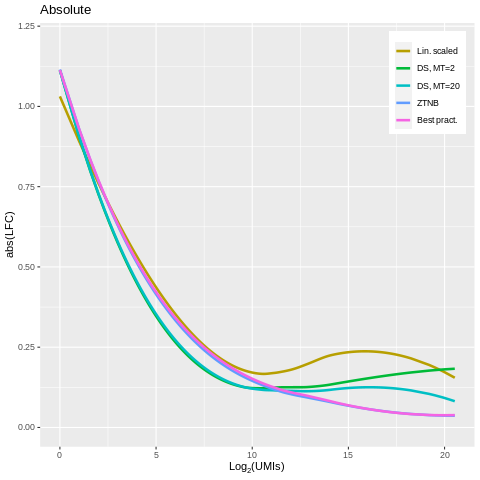

In [26]:
#Fig A: As B, but absolute error instead of CPM normalized
################################################################
%%R

df = data.frame(x=logumis, ds_20=abs(lfc_abs_ds_20), ds_2=abs(lfc_abs_ds_2), ztnb = abs(lfc_abs_ztnb), bp = abs(lfc_abs_bp), scaled = abs(lfc_abs_scaled) )

#now, a loess for each
#since we have many identical values, we need to aggregate them
#the new value is the mean, and weight is the number of identical values
cons = df %>% group_by(x) %>% summarize(weight=n(), ds_2 = mean(ds_2), ds_20 = mean(ds_20), ztnb = mean(ztnb), bp=mean(bp), scaled = mean(scaled))


loess_fitds_2 <- loess(ds_2~x, cons, span = 0.75, weights=cons$weight)
yds_2 = predict(loess_fitds_2, cons$x)

loess_fitds_20 <- loess(ds_20~x, cons, span = 0.75, weights=cons$weight)
yds_20 = predict(loess_fitds_20, cons$x)
#lines(cons$x, yds_20, col="gray", lwd=2)

loess_fitztnb <- loess(ztnb~x, cons, span = 0.75, weights=cons$weight)
yztnb = predict(loess_fitztnb, cons$x)
#lines(cons$x, yztnb, col="blue", lwd=2)

#skip this one, it is almost identical to ztnb
loess_fitbp <- loess(bp~x, cons, span = 0.75, weights=cons$weight) 
ybp = predict(loess_fitbp, cons$x)


loess_fitscaled <- loess(scaled~x, cons, span = 0.75, weights=cons$weight)
yscaled = predict(loess_fitscaled, cons$x)

#cut xes at 12, the rest is controlled by a single point
filt = cons$x <=40 #means no filtering

xes = rep(cons$x[filt],5)
ys = c(yscaled[filt], yds_2[filt], yds_20[filt], yztnb[filt], ybp[filt])
l = length(cons$x[filt])
meth = factor(c(rep(0,l),rep(1,l), rep(2,l), rep(3,l), rep(4,l)), c(0,1,2,3,4), 
              c("Lin. scaled", "DS, MT=2", "DS, MT=20", "ZTNB", "Best pract."))

dfplot = data.frame(x=xes, y = ys, Method=meth)

figA = ggplot(dfplot, aes(x=x, y=y)) + 
  geom_line(aes(colour = Method), size=1.2) + 
  ggtitle("Absolute") +
  labs(y="abs(LFC)", x=expression(Log[2]*"(UMIs)"))+
  
  #coord_cartesian(xlim=c(0,15), ylim = c(0,1.2)) +
  coord_cartesian(ylim = c(0,1.2)) +
  theme(legend.justification = c("right", "top"), legend.position= c(.98, .98), legend.title = element_blank()) + 
  scale_color_manual(values=colors[2:6])
print(figA)


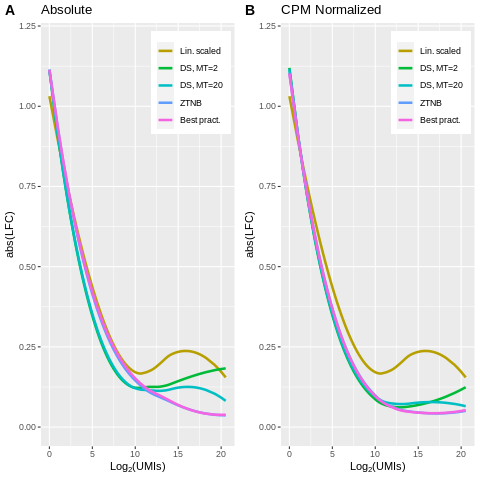

In [27]:
################################
# Now merge both figures
################################
%%R

figMult = ggarrange(figA, figB, nrow=1, ncol=2, labels=c("A","B"))

figS1All = figMult
print(figS1All)
ggsave(
  paste0(figure_path, "FigS6.png"),
  plot = figS1All, device = "png",
  width = 6, height = 4, dpi = 300)
